Generating plots for final project
1. Airbnb data over time
2. Airbnb vs Housing Prices
3. Airbnb vs Regional GDP

In [1]:
# NECESSARY IMPORTS
try:
    import seaborn as sns
    print(sns.__version__, "# If you are running a version < 0.11, the next cell will not work! Make sure to update your seaborn library")
except Exception as e:
    !pip install seaborn
    import seaborn as sns

0.13.2 # If you are running a version < 0.11, the next cell will not work! Make sure to update your seaborn library


In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.dates import YearLocator, DateFormatter
sns.set(font_scale=1.5) 
sns.set_context('talk')


AIRBNB DATA VS TIME

GRAPH EXPLANATION: The graph is displaying the change in listings over time for each major city we are considering. It does this by grabbing the first review date of each listing and then graphing it over time (Months to reduce noise).

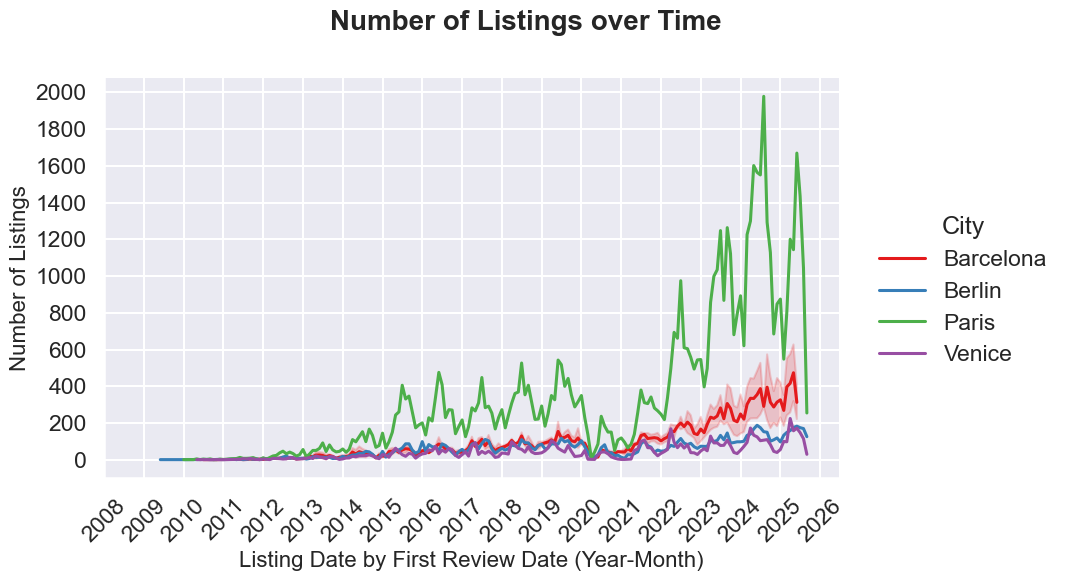

In [ ]:
# function to create a df
def create_df(file):
    airbnb = pd.read_csv(file)
    first_review = pd.to_datetime(airbnb['first_review'], format = '%m/%d/%y')
    clean_firstreview = first_review.dropna()
    year_month = clean_firstreview.dt.to_period('M')
    monthly_counts = year_month.value_counts().sort_index().reset_index()
    monthly_counts['Month/year'] = monthly_counts['first_review'].dt.to_timestamp()
    return monthly_counts.drop('first_review',axis = 1)

barcelona = create_df('data_files/barcelona_airbnb.csv')
barcelona['country'] = 'Barcelona'
berlin = create_df('data_files/berlin_airbnb.csv')
berlin['country'] = 'Berlin'
madrid = create_df('data_files/madrid_airbnb.csv')
madrid['country'] = 'Barcelona'
paris = create_df('data_files/paris_airbnb.csv')
paris['country'] = 'Paris'
venice = create_df('data_files/venice_airbnb.csv')
venice['country'] = 'Venice'
airbnb_data = pd.concat([barcelona, berlin, madrid, paris, venice], ignore_index= True)


plot = sns.relplot(data = airbnb_data, x="Month/year", y="count", hue="country", kind="line", linewidth=2.2, height=6, aspect=1.5, palette="Set1")
plot.fig.suptitle('Number of Listings over Time', fontsize = 20, fontweight = "bold")
plot.set_axis_labels('Listing Date by First Review Date (Year-Month)', 'Number of Listings', fontsize = 16)
plot._legend.set_title("City")
plot.set_xticklabels(rotation = 45)
plot.ax.xaxis.set_major_locator(mdates.YearLocator(1))
plot.ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plot.ax.yaxis.set_major_locator(ticker.MultipleLocator(200))
plot.tight_layout()

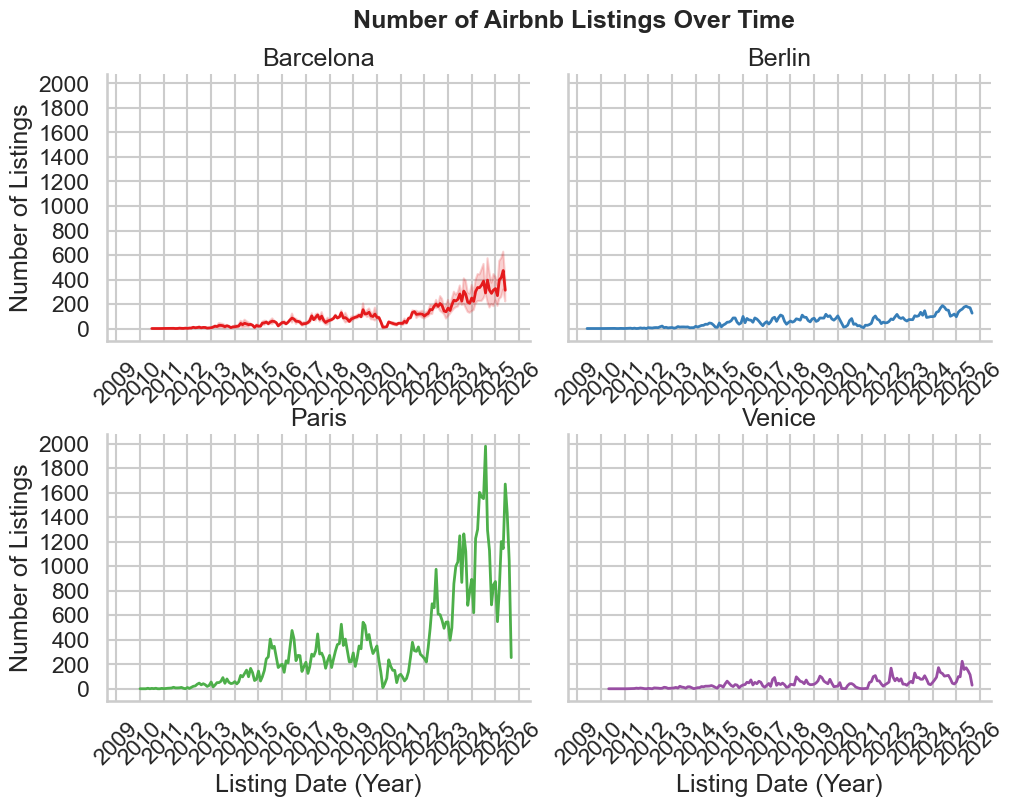

In [8]:
separated = sns.relplot(data=airbnb_data,x="Month/year",y="count", hue="country", kind="line", col="country", col_wrap=2, height=4, aspect=1.4, linewidth=2, palette="Set1",facet_kws={"sharex": True, "sharey": True})

separated.set_titles("{col_name}")  
separated.set_axis_labels("Listing Date (Year)", "Number of Listings")
separated.fig.suptitle("Number of Airbnb Listings Over Time", fontsize=18, fontweight="bold")

for ax in separated.axes.flat:
    ax.xaxis.set_major_locator(YearLocator(1))          
    ax.xaxis.set_major_formatter(DateFormatter("%Y"))   
    ax.tick_params(axis="x", rotation=45, labelbottom=True)
    ax.yaxis.set_major_locator(ticker.MultipleLocator(200))

if separated._legend:
    separated._legend.remove()
    
separated.fig.subplots_adjust(top=0.9, hspace=0.35)
separated.fig.set_size_inches(12, 8)

HOUSING PRICES VS AIRBNB
Graph explanation: These graphs show the difference (Housing prices - Airbnb listings) in annual variation for each characteristic to show the trend --if you want me to i can change this to a ratio

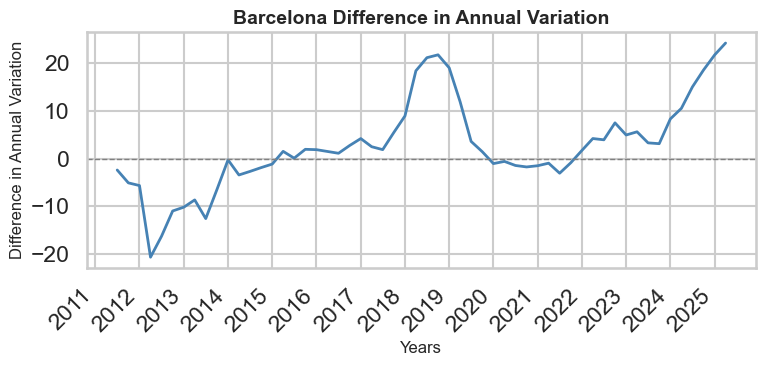

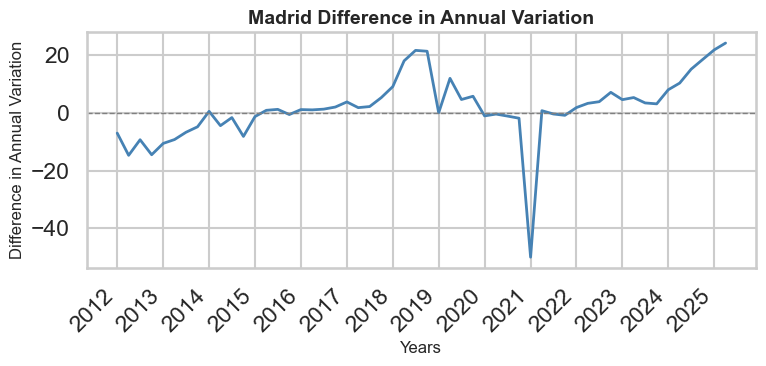

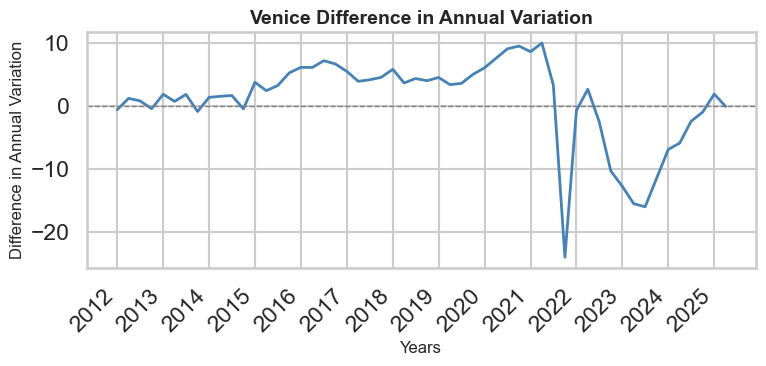

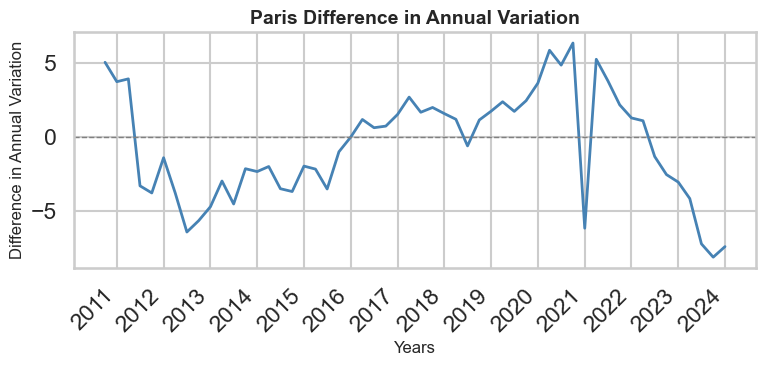

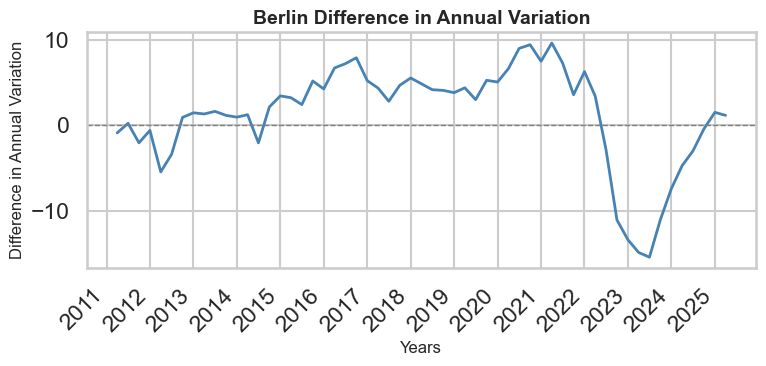

In [ ]:
def adjusting_housingdata(file):
    housing_prices = pd.read_csv(file)
    housing_prices['Month/year'] = pd.to_datetime(housing_prices['Month/year'], format = '%B %Y')
    housing_prices['Annual_variation'] = housing_prices['Annual_variation'].str.replace('%','').astype(float)
    return housing_prices.sort_values('Month/year')

def creating_difference(file, airbnb, country):
    housing = adjusting_housingdata(file)
    airbnb['Month/year'] = pd.to_datetime(airbnb['Month/year'])
    airbnb = airbnb.sort_values('Month/year')
    combination = pd.merge(airbnb, housing, on = 'Month/year')
    combination = combination.drop('country', axis = 1)
    combination['Variation_Airbnb'] = (combination['count'].pct_change(periods=3).astype(float))
    combination = combination.dropna()
    combination['Difference'] = combination['Annual_variation'] - combination['Variation_Airbnb']
    sns.set_style("whitegrid")
    plt.figure(figsize=(8, 4))
    ax = sns.lineplot(data=combination, x='Month/year', y='Difference', linewidth=2, color='steelblue')
    
    ax.axhline(0, color='gray', linestyle='--', linewidth=1)
    
    ax.set_title(f"{country} Difference in Annual Variation", fontsize=14, weight='bold')
    ax.set_xlabel('Years', fontsize=12)
    ax.set_ylabel('Difference in Annual Variation', fontsize=12)
    
    ax.xaxis.set_major_locator(mdates.YearLocator(1))   
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.xticks(rotation=45, ha='right') 

    plt.tight_layout()
    plt.show()


barcelona_housing_graph = creating_difference('data_files/barcelona_housingprices.csv', barcelona, 'Barcelona')
madrid_housing_graph = creating_difference('data_files/madrid_housingprices.csv', madrid, 'Madrid')
venice_housing_graph = creating_difference('data_files/venice_housingprices.csv', venice, 'Venice')
paris_housing_graph = creating_difference('data_files/paris_housingprices.csv', paris, 'Paris')
berlin_housing_graph = creating_difference('data_files/berlin_housingprices.csv', berlin, 'Berlin')



REGIONAL_GDP vs AIRBNB
Graph Explanation: These graphs are showing the change in ratio (Listings/Regional GDP) over time. the change in ratio can give us an idea of the change in trends in terms of listings & gdp(lmk if this makes sense i can change how the graph is)

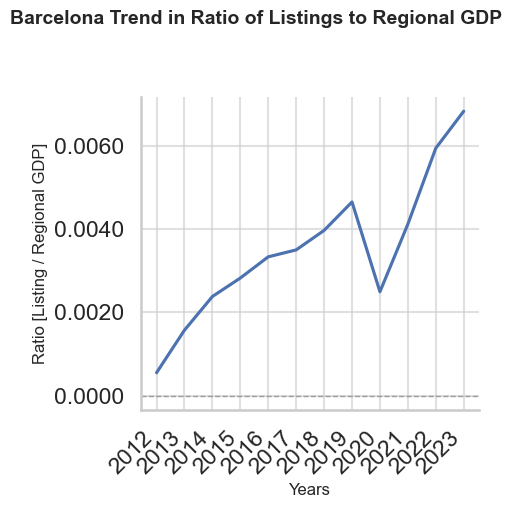

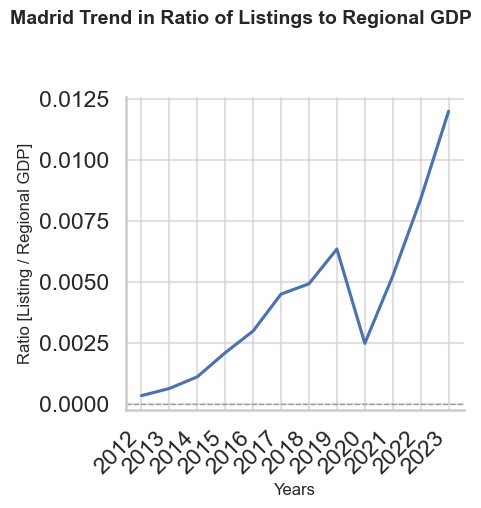

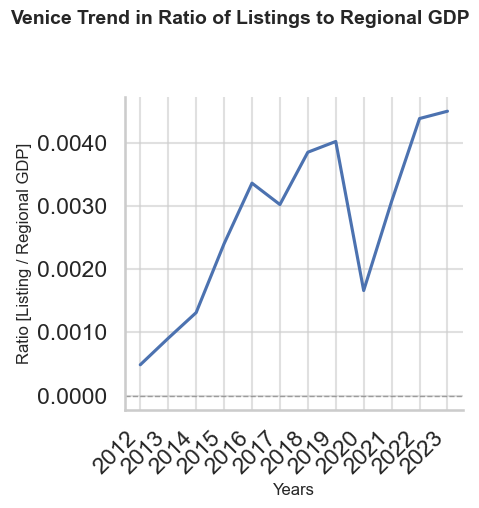

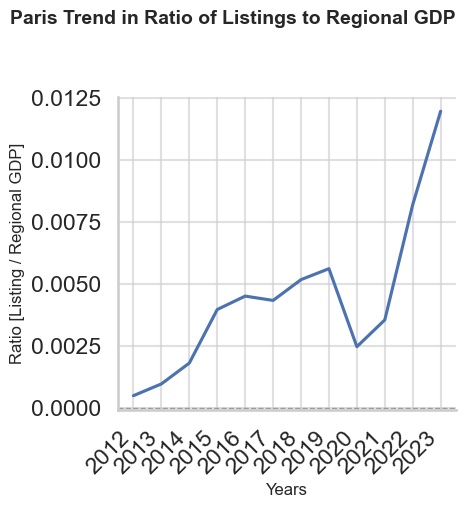

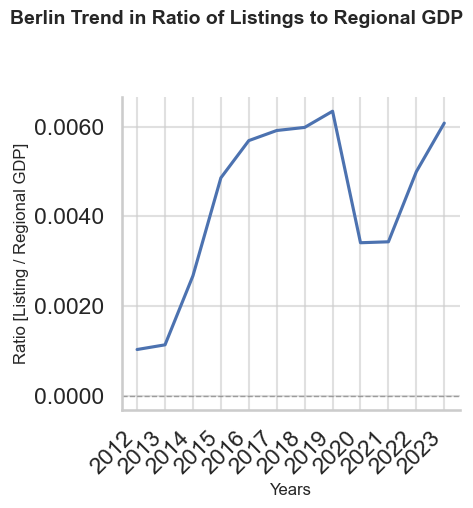

In [ ]:
def regional_gdp(file):
    gdp = pd.read_csv(file)
    gdp['Year']= pd.to_datetime(gdp['Date'], format = '%Y').dt.year
    gdp = gdp.drop('Date', axis = 1)
    gdp['Regional_GDP'] = gdp['Regional_GDP'].str.replace(",","").astype(float)
    return gdp
def combine_two(file, airbnb):
    yearly = airbnb.copy()
    yearly['Year'] = yearly['Month/year'].dt.year
    yearly = yearly.groupby('Year')['count'].sum().reset_index()
    yearly = yearly.set_index('Year')
    yearly = yearly.drop([2010,2011,2024])
    gdp = regional_gdp(file)
    combine = pd.merge(yearly, gdp, on = 'Year')
    combine['Ratio'] = combine['count']/combine['Regional_GDP']
    return combine
def plot_graph(file, airbnb, country):
    data = combine_two(file, airbnb)
    plot = sns.relplot(data=data, x='Year', y='Ratio', kind = 'line')
    plot.fig.suptitle(
        f"{country} Trend in Ratio of Listings to Regional GDP",
        fontsize=14, fontweight='bold', y=1.03
    )
    plot.ax.set_xlabel('Years', fontsize=12)
    plot.ax.set_ylabel('Ratio [Listing / Regional GDP]', fontsize=12)
    plot.ax.set_xticks(range(2012, 2024))
    plot.ax.set_xticklabels(range(2012, 2024), rotation=45, ha='right')

    plot.ax.grid(alpha=0.6)
    plot.ax.axhline(0, color='gray', linestyle='--', linewidth=1, alpha=0.7)

    plot.ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.4f'))

    plt.tight_layout()
    plt.show()
    return None

barcelona_gdp = plot_graph('data_files/Regional_GDP - Barcelona.csv', barcelona, 'Barcelona')
madrid_gdp = plot_graph('data_files/Regional_GDP - Madrid.csv', madrid, 'Madrid')
venice_gdp = plot_graph('data_files/Regional_GDP - Venice.csv', venice, 'Venice')
paris_gdp = plot_graph('data_files/Regional_GDP - Paris.csv', paris, 'Paris')
berlin_gdp = plot_graph('data_files/Regional_GDP - Berlin.csv', berlin, 'Berlin')

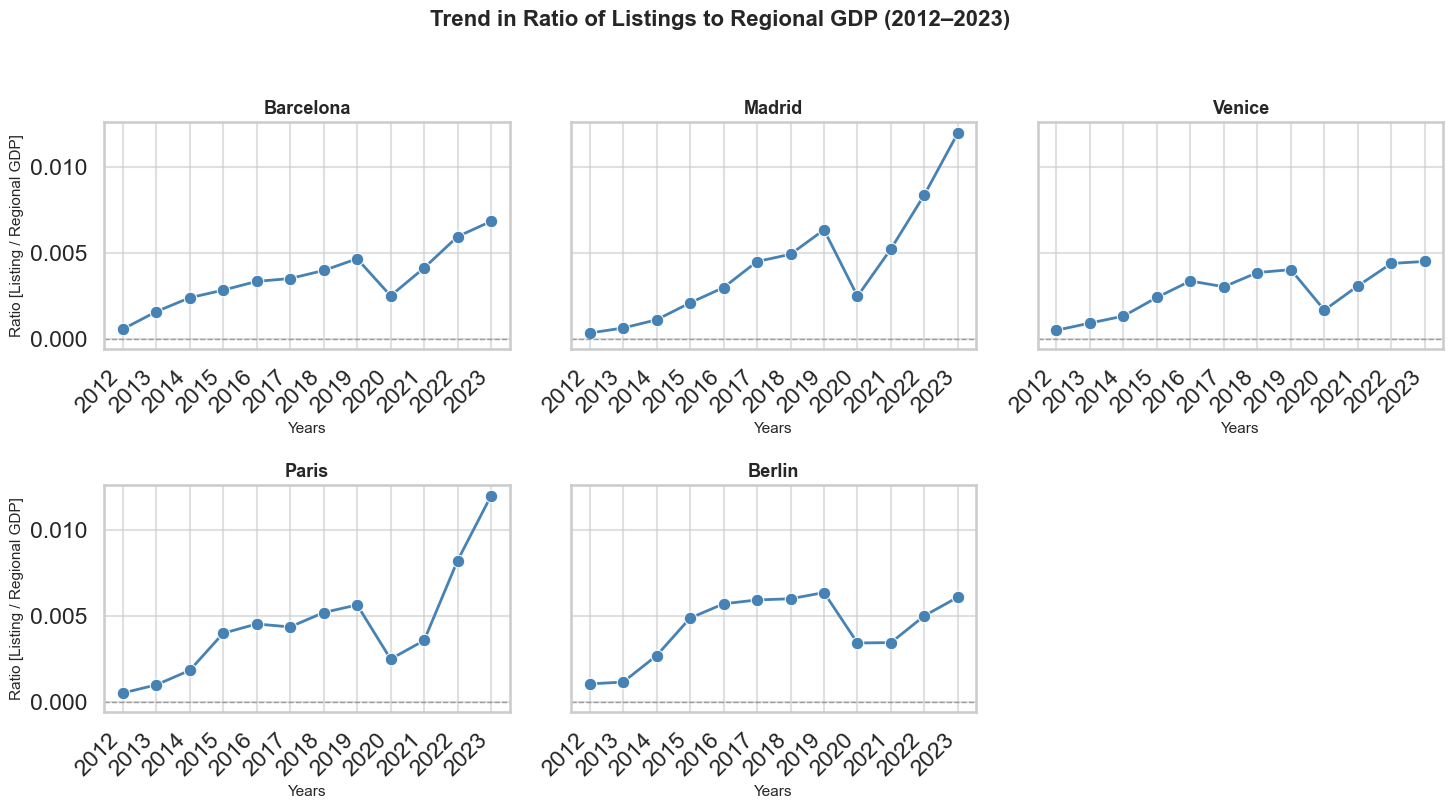

In [9]:

def regional_gdp_v2(file):
    gdp = pd.read_csv(file)
    gdp['Year'] = pd.to_datetime(gdp['Date'], format='%Y').dt.year
    gdp = gdp.drop('Date', axis=1)
    gdp['Regional_GDP'] = gdp['Regional_GDP'].str.replace(",", "").astype(float)
    return gdp
def combine_two_v2(file, airbnb):
    yearly = airbnb.copy()
    yearly['Year'] = yearly['Month/year'].dt.year
    yearly = yearly.groupby('Year')['count'].sum().reset_index()
    # keep Year as column here (no set_index) to avoid surprises
    yearly = yearly[~yearly['Year'].isin([2010, 2011, 2024])]
    gdp = regional_gdp_v2(file)
    combine = pd.merge(yearly, gdp, on='Year')
    combine['Ratio'] = combine['count'] / combine['Regional_GDP']
    return combine

def plot_all_cities_gdp_grid(cities, figsize=(15,8), common_ylim=None):
    fig, axes = plt.subplots(2, 3, figsize=figsize, sharey=True)
    axes = axes.flatten()

    for i, (file, airbnb, city) in enumerate(cities):
        data = combine_two_v2(file, airbnb)
        ax = axes[i]
        sns.lineplot(
            data=data, x='Year', y='Ratio',
            ax=ax, linewidth=2, marker='o', color='steelblue'
        )

        ax.set_title(f"{city}", fontsize=13, fontweight='bold', pad=6)
        ax.set_xlabel("Years", fontsize=11)
        if i % 3 == 0:
            ax.set_ylabel("Ratio [Listing / Regional GDP]", fontsize=11)
        else:
            ax.set_ylabel("")
        ax.set_xticks(range(2012, 2024))
        ax.set_xticklabels(range(2012, 2024), rotation=45, ha='right')
        ax.grid(alpha=0.6)
        ax.axhline(0, color='gray', linestyle='--', linewidth=1, alpha=0.7)

        if common_ylim is not None:
            ax.set_ylim(common_ylim)

    for j in range(len(cities), len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle("Trend in Ratio of Listings to Regional GDP (2012–2023)",
                 fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()


plot_all_cities_gdp_grid([
    ('data_files/Regional_GDP - Barcelona.csv', barcelona, 'Barcelona'),
    ('data_files/Regional_GDP - Madrid.csv', madrid, 'Madrid'),
    ('data_files/Regional_GDP - Venice.csv', venice, 'Venice'),
    ('data_files/Regional_GDP - Paris.csv', paris, 'Paris'),
    ('data_files/Regional_GDP - Berlin.csv', berlin, 'Berlin')
], common_ylim=None) 